In [1]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
#S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [2]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

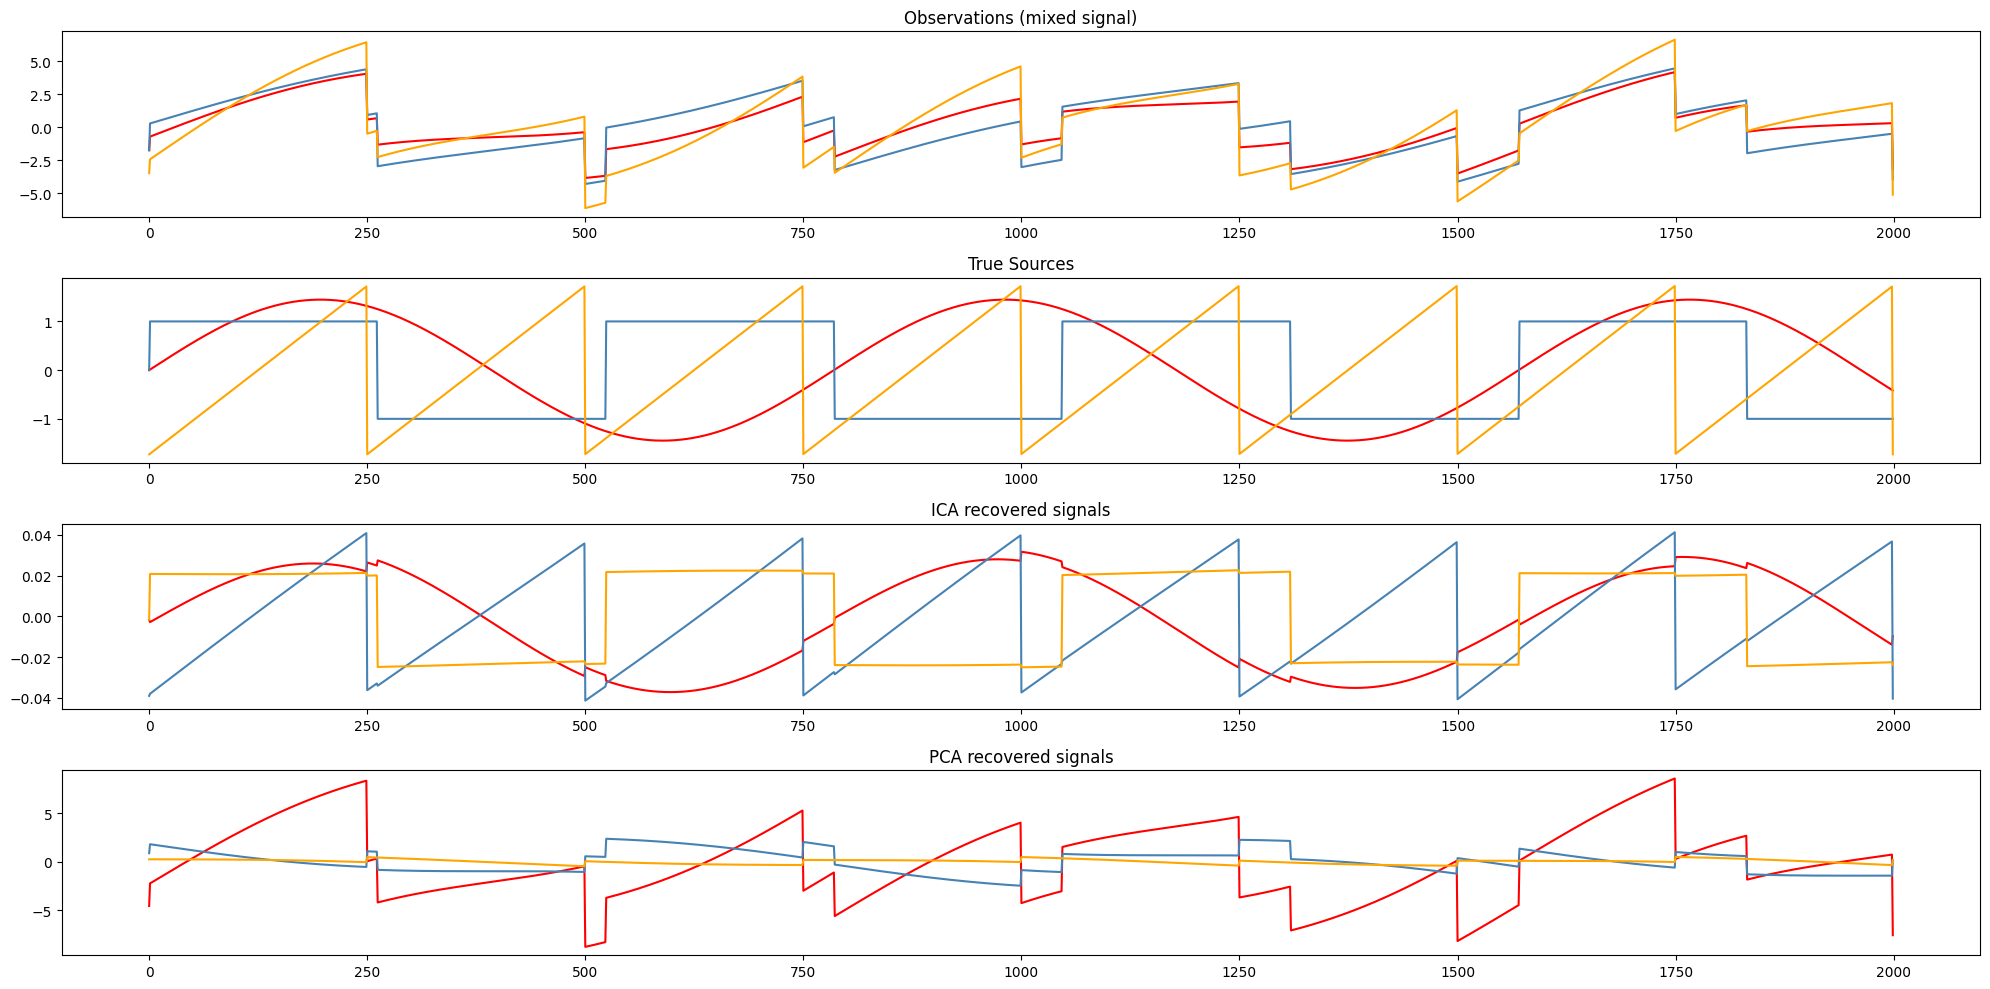

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

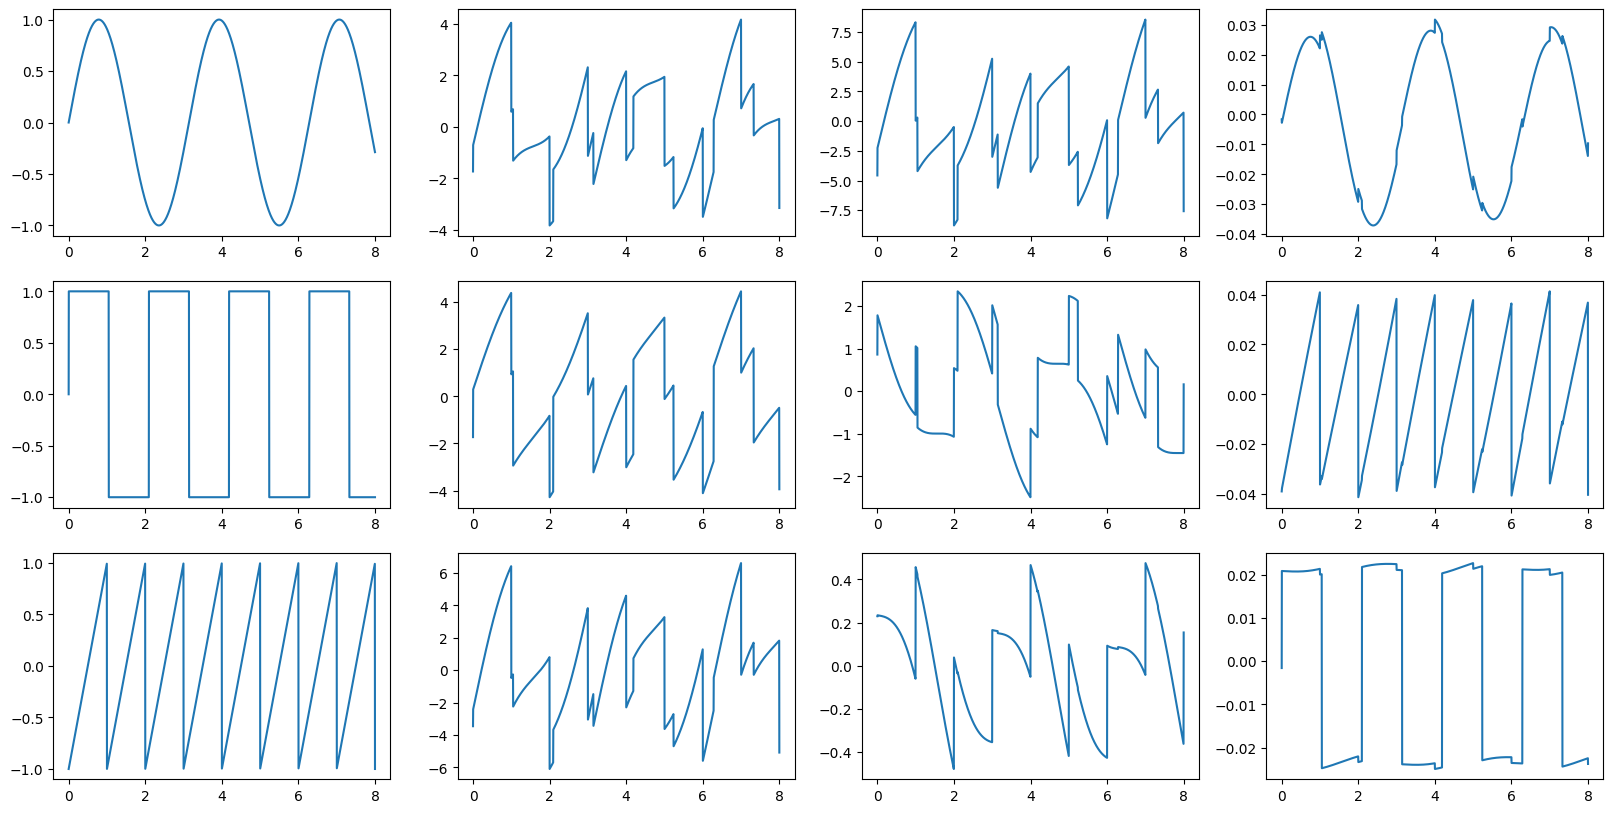

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
#True signal
axs[0,0].plot(time,s1)
axs[1,0].plot(time,s2)
axs[2,0].plot(time,s3)
# Observed signal
axs[0,1].plot(time,X[:,0])
axs[1,1].plot(time,X[:,1])
axs[2,1].plot(time,X[:,2])
#PCA signal
axs[0,2].plot(time,H[:,0])
axs[1,2].plot(time,H[:,1])
axs[2,2].plot(time,H[:,2])
#ICA signal
axs[0,3].plot(time,S_[:,0])
axs[1,3].plot(time,S_[:,1])
axs[2,3].plot(time,S_[:,2])

In [5]:
S_.shape

(2000, 3)